<a href="https://colab.research.google.com/github/EvgeniiSopov/plotlyRendering/blob/master/ITPZ_21_09_2020_DF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Создадим dataframe для примера. Стандартный способ создания - использовать объект словарь (dictionary).

In [2]:
data = {
    'name' : ['Xavier', 'Ann', 'Jana', 'Yi', 'Robin', 'Amai', 'Nori'],
    'city' : ['Mexico City', 'Toronto', 'Prague', 'Shanghai', 'Manchester', 'Cairo', 'Osaka'],
    'age' : [41, 28, 33, 34, 38, 31, 37],
    'py-score' : [88.0, 79.0, 81.0, 80.0, 68.0, 61.0, 84.0]
}
row_labels= [101, 102, 103, 104, 105, 106, 107]

In [3]:
df1 = pd.DataFrame(data=data, index=row_labels)
df1

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
102,Ann,Toronto,28,79.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
105,Robin,Manchester,38,68.0
106,Amai,Cairo,31,61.0
107,Nori,Osaka,37,84.0


In [4]:
df2=df1[['city', 'age', 'py-score']].copy()
df2.index=df1.name
df2

,city,age,py-score
name,,,
Xavier,Mexico City,41,88.0
Ann,Toronto,28,79.0
Jana,Prague,33,81.0
Yi,Shanghai,34,80.0
Robin,Manchester,38,68.0
Amai,Cairo,31,61.0
Nori,Osaka,37,84.0


Доступ к элементам dataframe

In [5]:
df1['city']

101    Mexico City
102        Toronto
103         Prague
104       Shanghai
105     Manchester
106          Cairo
107          Osaka
Name: city, dtype: object

In [6]:
df1.city

101    Mexico City
102        Toronto
103         Prague
104       Shanghai
105     Manchester
106          Cairo
107          Osaka
Name: city, dtype: object

In [7]:
df1['city'][102]

'Toronto'

Функции .loc .iloc к любым элементам dataframe. Буква i говорит о том, что указывается индек (целое число), означающий позицию в dataframe.

Функции .at .iat для доступа к конкретному значению.

In [8]:
df1.loc[103]

name          Jana
city        Prague
age             33
py-score        81
Name: 103, dtype: object

In [9]:
df1.iloc[0]

name             Xavier
city        Mexico City
age                  41
py-score             88
Name: 101, dtype: object

In [10]:
df1.loc[:, 'city']

101    Mexico City
102        Toronto
103         Prague
104       Shanghai
105     Manchester
106          Cairo
107          Osaka
Name: city, dtype: object

In [11]:
df1.iloc[:, 1]

101    Mexico City
102        Toronto
103         Prague
104       Shanghai
105     Manchester
106          Cairo
107          Osaka
Name: city, dtype: object

In [12]:
df1.iloc[3:6, [0,1,3]]

,name,city,py-score
104,Yi,Shanghai,80.0
105,Robin,Manchester,68.0
106,Amai,Cairo,61.0


In [13]:
df1.at[103,'name']

'Jana'

In [14]:
df2['city']

name
Xavier    Mexico City
Ann           Toronto
Jana           Prague
Yi           Shanghai
Robin      Manchester
Amai            Cairo
Nori            Osaka
Name: city, dtype: object

In [15]:
df2.loc['Jana']

city        Prague
age             33
py-score        81
Name: Jana, dtype: object

Операция транспонирования. Аналог разворота осей в ХД.

In [16]:
df1.T

,101,102,103,104,105,106,107
name,Xavier,Ann,Jana,Yi,Robin,Amai,Nori
city,Mexico City,Toronto,Prague,Shanghai,Manchester,Cairo,Osaka
age,41,28,33,34,38,31,37
py-score,88,79,81,80,68,61,84


In [17]:
df2.T

name,Xavier,Ann,Jana,Yi,Robin,Amai,Nori
city,Mexico City,Toronto,Prague,Shanghai,Manchester,Cairo,Osaka
age,41,28,33,34,38,31,37
py-score,88,79,81,80,68,61,84


Доступ к полям и свойствам.

In [18]:
df1.index

Int64Index([101, 102, 103, 104, 105, 106, 107], dtype='int64')

In [19]:
df1.columns

Index(['name', 'city', 'age', 'py-score'], dtype='object')

In [20]:
df1.ndim

2

In [21]:
df1.shape

(7, 4)

In [22]:
df1.size

28

In [23]:
df1.memory_usage()

Index       376
name         56
city         56
age          56
py-score     56
dtype: int64

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 101 to 107
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7 non-null      object 
 1   city      7 non-null      object 
 2   age       7 non-null      int64  
 3   py-score  7 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 600.0+ bytes


Добавление и удаление элементов.

In [25]:
df1['c++ score']=[71.0, 15.0, 88.0, 56.0, np.nan, np.nan, np.nan]
df1

,name,city,age,py-score,c++ score
101,Xavier,Mexico City,41,88.0,71.0
102,Ann,Toronto,28,79.0,15.0
103,Jana,Prague,33,81.0,88.0
104,Yi,Shanghai,34,80.0,56.0
105,Robin,Manchester,38,68.0,NaN
106,Amai,Cairo,31,61.0,NaN
107,Nori,Osaka,37,84.0,NaN


In [26]:
df1=df1.drop(columns=['c++ score'])
df1

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
102,Ann,Toronto,28,79.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
105,Robin,Manchester,38,68.0
106,Amai,Cairo,31,61.0
107,Nori,Osaka,37,84.0


In [27]:
john=pd.Series(data=['John', 'Boston', 34, 78], index=df1.columns, name=17)
df1=df1.append(john)
df1

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
102,Ann,Toronto,28,79.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
105,Robin,Manchester,38,68.0
106,Amai,Cairo,31,61.0
107,Nori,Osaka,37,84.0
17,John,Boston,34,78.0


In [28]:
df1=df1.drop(labels=[17])
df1

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
102,Ann,Toronto,28,79.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
105,Robin,Manchester,38,68.0
106,Amai,Cairo,31,61.0
107,Nori,Osaka,37,84.0


Сортировка.

In [29]:
df1.sort_values(by='py-score', ascending=False)

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
107,Nori,Osaka,37,84.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
102,Ann,Toronto,28,79.0
105,Robin,Manchester,38,68.0
106,Amai,Cairo,31,61.0


In [30]:
df1.sort_values(by=['py-score', 'age'], ascending=[False, True])

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
107,Nori,Osaka,37,84.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
102,Ann,Toronto,28,79.0
105,Robin,Manchester,38,68.0
106,Amai,Cairo,31,61.0


Фильтры, отбор по логическим условиям.

In [31]:
mask = df1['age'] < 38
mask

101    False
102     True
103     True
104     True
105    False
106     True
107     True
Name: age, dtype: bool

In [32]:
df1[mask]

,name,city,age,py-score
102,Ann,Toronto,28,79.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
106,Amai,Cairo,31,61.0
107,Nori,Osaka,37,84.0


In [33]:
df1[ (df1['age'] < 38) & (df1['py-score'] >= 80) ]

,name,city,age,py-score
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
107,Nori,Osaka,37,84.0


In [34]:
df1['city'].where(cond=(df1['city'] == 'Osaka'), other='No City')

101    No City
102    No City
103    No City
104    No City
105    No City
106    No City
107      Osaka
Name: city, dtype: object

Обработка пропусков.

In [35]:
df1.loc[102,'age']=np.nan
df1.loc[106,'age']=np.nan
df1.loc[101,'py-score']=np.nan
df1.loc[107,'py-score']=np.nan
df1

,name,city,age,py-score
101,Xavier,Mexico City,41.0,NaN
102,Ann,Toronto,NaN,79.0
103,Jana,Prague,33.0,81.0
104,Yi,Shanghai,34.0,80.0
105,Robin,Manchester,38.0,68.0
106,Amai,Cairo,NaN,61.0
107,Nori,Osaka,37.0,NaN


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 101 to 107
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7 non-null      object 
 1   city      7 non-null      object 
 2   age       5 non-null      float64
 3   py-score  5 non-null      float64
dtypes: float64(2), object(2)
memory usage: 600.0+ bytes


In [37]:
print("число пропусков")
df1.isna().sum()

число пропусков


name        0
city        0
age         2
py-score    2
dtype: int64

In [38]:
print("число пропусков, %")
df1.isna().sum()*100/7

число пропусков, %


name         0.000000
city         0.000000
age         28.571429
py-score    28.571429
dtype: float64

In [39]:
df1.mean()

age         36.6
py-score    73.8
dtype: float64

In [40]:
df1.mean(skipna=False)

age        NaN
py-score   NaN
dtype: float64

In [41]:
df1.dropna()

,name,city,age,py-score
103,Jana,Prague,33.0,81.0
104,Yi,Shanghai,34.0,80.0
105,Robin,Manchester,38.0,68.0


In [42]:
df1.dropna(axis=1)

,name,city
101,Xavier,Mexico City
102,Ann,Toronto
103,Jana,Prague
104,Yi,Shanghai
105,Robin,Manchester
106,Amai,Cairo
107,Nori,Osaka


In [43]:
df1['age'].fillna(value=35)

101    41.0
102    35.0
103    33.0
104    34.0
105    38.0
106    35.0
107    37.0
Name: age, dtype: float64

In [44]:
df1.fillna(df1.mean())

,name,city,age,py-score
101,Xavier,Mexico City,41.0,73.8
102,Ann,Toronto,36.6,79.0
103,Jana,Prague,33.0,81.0
104,Yi,Shanghai,34.0,80.0
105,Robin,Manchester,38.0,68.0
106,Amai,Cairo,36.6,61.0
107,Nori,Osaka,37.0,73.8


DataFrame как последовательность значений.

In [45]:
N = 100
rng = pd.date_range('2020-09-21', freq='MS', periods=N)
df3 = pd.DataFrame(np.random.rand(N, 1), columns=['x'], index=rng)
df3

,x
2020-10-01,0.092214
2020-11-01,0.385849
2020-12-01,0.932768
2021-01-01,0.413196
2021-02-01,0.758925
...,...
2028-09-01,0.679243
2028-10-01,0.611125
2028-11-01,0.668697
2028-12-01,0.856733


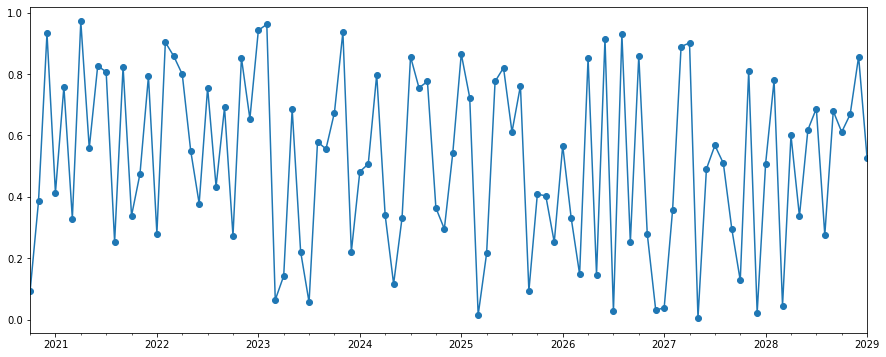

In [46]:
fig, ax = plt.subplots(figsize=(15,6))
df3.plot(ax=ax, marker='o')
ax.get_legend().remove()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


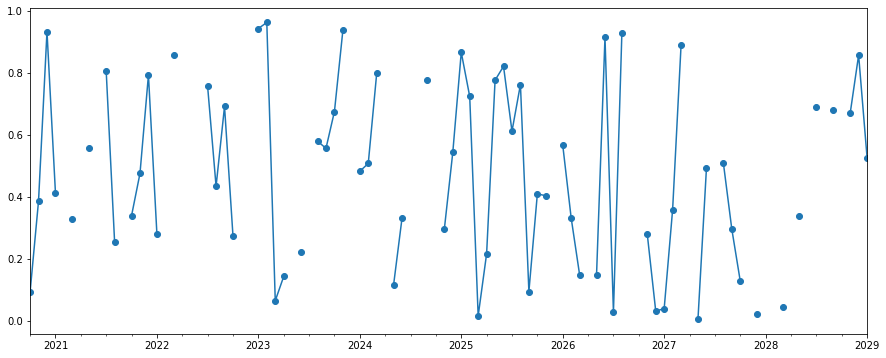

In [47]:
df4=df3.copy()
df4.loc[df4.sample(frac=0.3).index] = pd.np.nan

fig, ax = plt.subplots(figsize=(15,6))
df4.plot(ax=ax, marker='o')
ax.get_legend().remove()
plt.show()

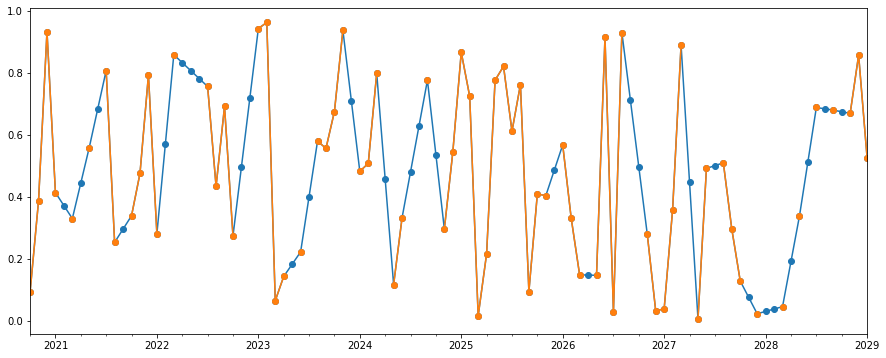

In [48]:
fig, ax = plt.subplots(figsize=(15,6))
df4.interpolate(method='linear').plot(ax=ax, marker='o')
df4.plot(ax=ax, marker='o')
ax.get_legend().remove()
plt.show()

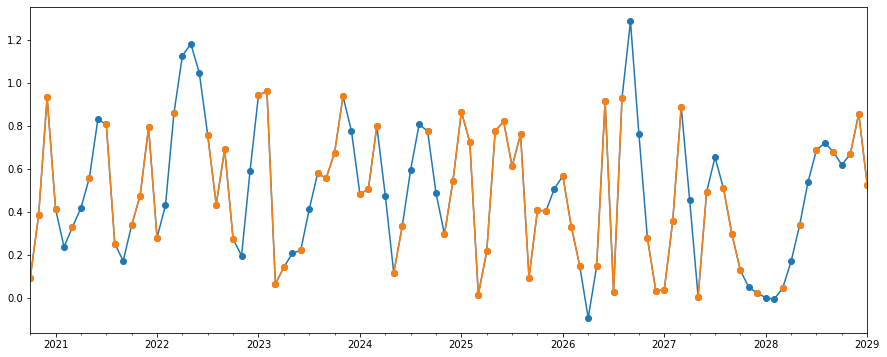

In [49]:
fig, ax = plt.subplots(figsize=(15,6))
df4.interpolate(method='polynomial', order=2).plot(ax=ax, marker='o')
df4.plot(ax=ax, marker='o')
ax.get_legend().remove()
plt.show()

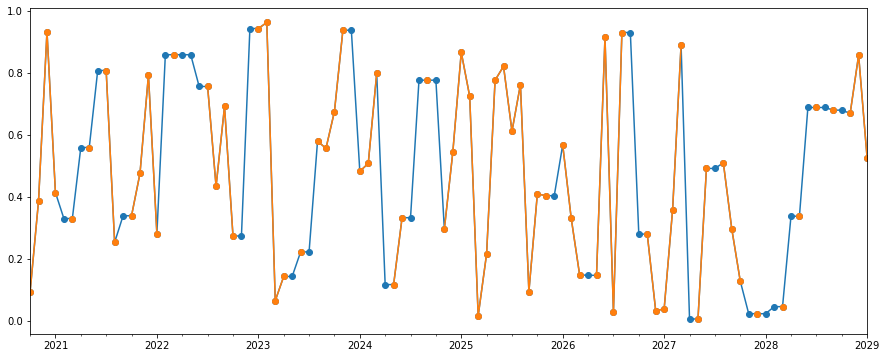

In [50]:
fig, ax = plt.subplots(figsize=(15,6))
df4.interpolate(method='nearest').plot(ax=ax, marker='o')
df4.plot(ax=ax, marker='o')
ax.get_legend().remove()
plt.show()